# Data loading and pre-processing
The dataset can be download from --> https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import string # from some string manipulation tasks
import nltk # natural language toolkit
import re # regex
from string import punctuation # solving punctuation problems
from nltk.corpus import stopwords # stop words in sentences
from nltk.stem import WordNetLemmatizer # For stemming the sentence
from nltk.stem import SnowballStemmer # For stemming the sentence
!pip install autocorrect
!pip install contractions

from contractions import contractions_dict # to solve contractions
from autocorrect import Speller #correcting the spellings
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

#Libraries for general purpose
import matplotlib.pyplot as plt
import seaborn as sns


#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("drive/MyDrive/cyberbullying_tweets.csv")
df.head(5)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [ ]:
#DROPPING other_cyberbullying as it might cause confiusion
df.drop(df[df['cyberbullying_type'] == 'other_cyberbullying'].index, inplace = True)
df['cyberbullying_type'].value_counts()

religion             7998
age                  7992
gender               7973
ethnicity            7961
not_cyberbullying    7945
Name: cyberbullying_type, dtype: int64

In [ ]:
df.shape

(39869, 2)

In [ ]:
#checking type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39869 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          39869 non-null  object
 1   cyberbullying_type  39869 non-null  object
dtypes: object(2)
memory usage: 934.4+ KB


In [ ]:
# Renaming Categories
df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})
df.head(5)

,text,sentiment
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
#changing sentiments into numbers --> religion = 1, age= 2, gender= 3, ethnicity = 4, not cyberbullying = 5
df["sentiment"].replace({"religion": 1, "age": 2, "gender": 3, "ethnicity": 4, "not_cyberbullying": 5}, inplace=True)

In [ ]:
sentiments = ["religion","age","gender","ethnicity","not bullying"]

In [ ]:
# Text Cleaning
#import libraries
import re, string
!pip install emoji==1.7.0
import emoji
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
# print(stopwords.words('english')) this will display list of stopwords

stop_words = set(stopwords.words('english'))

#clean emojis from text  re library

def remove_emoji(txt):
    return re.sub(emoji.get_emoji_regexp(), r"", txt) #remove emoji
# emoji.get_emoji_regexp() Returns a regex to match any emoji

#remove punctuations, links, stopwords, mentions and \r\n new line characters

def char_cleaning(txt):
    txt = txt.replace('\r', '').replace('\n', ' ').lower() #remove \n and \r. Lowercase text
    txt = re.sub(r"(?:\@|https?\://)\S+", "", txt) #remove links and mentions
    txt = re.sub(r'[^\x00-\x7f]',r'', txt) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    punct = string.punctuation  # --> all sets of punctuation
    map_table = str.maketrans('', '', punct) #  mapping table
    txt = txt.translate(map_table) #  The string translate() method returns a string where each character is mapped to its corresponding character in the translation table
    txt = [word for word in txt.split() if word not in stop_words]
    txt = ' '.join(txt)
    txt =' '.join(word for word in txt.split() if len(word) < 14) # remove words longer than 14 characters
    return txt

#no shortcuts cant, dont, shouldnt..... replace with full form and remove
def remove_contractions(txt):
    txt = re.sub(r"can\'t", "can not", txt)
    txt = re.sub(r"n\'t", " not", txt)
    txt = re.sub(r"\'re", " are", txt)
    txt = re.sub(r"\'s", " is", txt)
    txt = re.sub(r"\'d", " would", txt)
    txt = re.sub(r"\'ll", " will", txt)
    txt = re.sub(r"\'t", " not", txt)
    txt = re.sub(r"\'ve", " have", txt)
    txt = re.sub(r"\'m", " am", txt)
    return txt

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the "#" symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as "&" and "$" present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Remove multiple sequential spaces
def remove_mult_spaces(txt):
    return re.sub("\s\s+" , " ", txt)

# Explained here ---> https://exchange.scale.com/public/blogs/preprocessing-techniques-in-nlp-a-guide
#Stemming
def stemmer(txt):
    tokenized = nltk.word_tokenize(txt)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

#Lemmatization
def lemmatize(txt):
    tokenized = nltk.word_tokenize(txt)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

#Then we apply all the defined functions in the following order
def preprocess(txt):
    txt = remove_emoji(txt)
    txt = remove_contractions(txt)
    txt = char_cleaning(txt)
    txt = clean_hashtags(txt)
    txt = filter_chars(txt)
    txt = remove_mult_spaces(txt)
    txt = stemmer(txt)
    txt = lemmatize(txt)
    return txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

# !pip install nltk==3.6.1
nltk.download('omw-1.4')
cleaned_tweets = []
for t in df.text:
    cleaned_tweets.append(preprocess(t))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-57-78fd8a0ce7e8>:16: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  return re.sub(emoji.get_emoji_regexp(), r"", txt) #remove emoji


In [ ]:
df['clean_text'] = cleaned_tweets

In [ ]:
df

,text,sentiment,clean_text
0,"In other words #katandandre, your food was cra...",5,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,5,aussietv white mkr theblock today sunris studi...
2,@XochitlSuckkks a classy whore? Or more red ve...,5,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",5,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,5,isi account pretend kurdish account like islam...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",4,black ppl expect anyth depend anyth yet free p...
47688,Turner did not withhold his disappointment. Tu...,4,turner withhold turner call court abomin concl...
47689,I swear to God. This dumb nigger bitch. I have...,4,swear god dumb nigger bitch got bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,4,yea fuck rt your nigger fuck unfollow fuck dum...


In [ ]:
df["clean_text"].duplicated().sum()

1051

In [ ]:
df.drop_duplicates("clean_text", inplace=True)
# #DROPPING other_cyberbullying as it might cause confiusion
# df.drop(df[df['sentiment'] == 'other_cyberbullying'].index, inplace = True)
# df['sentiment'].value_counts()

In [ ]:
# there is small imbalance in data
df.sentiment.value_counts()

1    7945
2    7884
4    7746
5    7636
3    7607
Name: sentiment, dtype: int64

In [ ]:
# Analyse length of the tweets

text_len = []
for text in df.clean_text:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

df['text_len'] = text_len

In [ ]:
# removing tweets with less than 4 words and more than 40

df = df[df['text_len'] > 3]
df = df[df['text_len'] < 40]
print(len(df))

37093


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import numpy as np #to get the color of our image

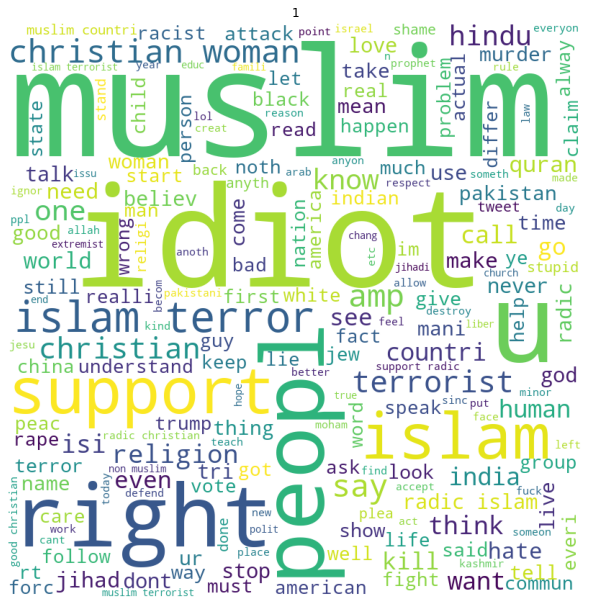

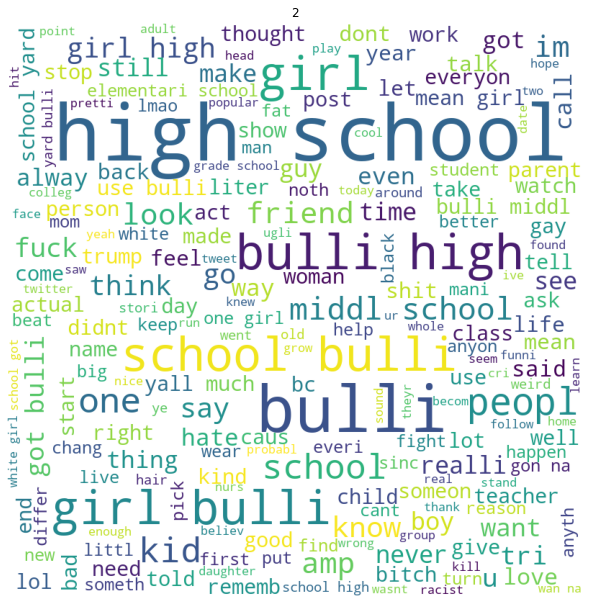

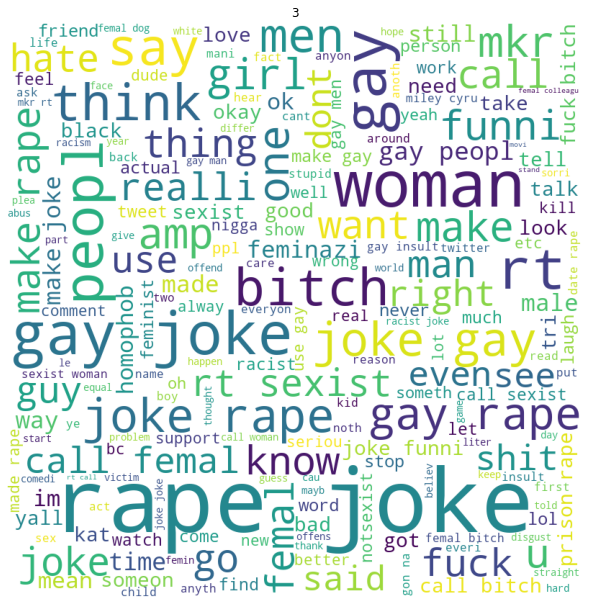

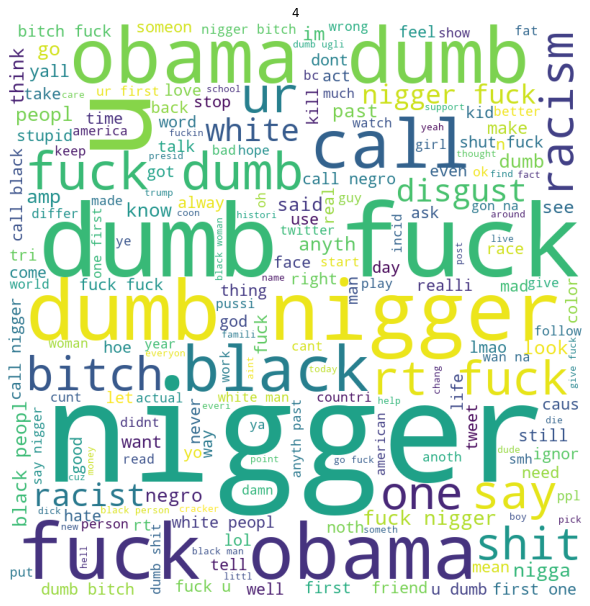

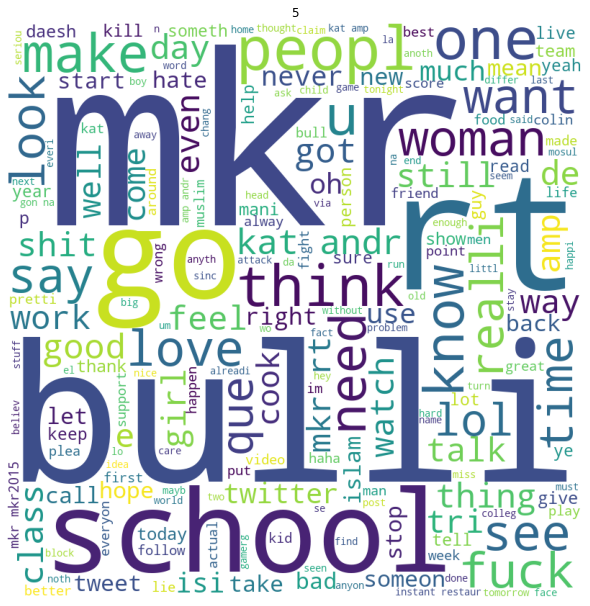

In [ ]:
#
from sklearn.preprocessing import LabelEncoder
# LabelEncoder can be used to normalize labels --> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
lenc = LabelEncoder()
df.sentiment = lenc.fit_transform(df.sentiment)

for c in range(len(lenc.classes_)):  # lenc.classes_  [0, 1, 2, 3, 4]
    string = ""
    for i in df[df.sentiment == c].clean_text.values:
        string = string + " " + i.strip()

#     custom_mask = np.array(Image.open('kindpng_1061402.png')) # --> to download icon https://www.kindpng.com/imgv/JhToxm_s-svg-icon-free-twitter-icon-black-png/
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
#                 mask = custom_mask,
                min_font_size = 10).generate(string)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(lenc.classes_[c])
    plt.show()
    del string

# Dataset split for different experiments
Character, unigram, bigram, Bag of words

First we are decreasing data to have 8k examples

In [ ]:
df['sentiment'].value_counts()


0    7881
1    7830
3    7703
2    7309
4    6370
Name: sentiment, dtype: int64

In [ ]:
#"religion": 0, "age": 1, "gender": 2, "ethnicity": 3, "not_cyberbullying": 4
religion = df[df["sentiment"]==0]
age = df[df["sentiment"]==1]
gender = df[df["sentiment"]==2]
ethnicity = df[df["sentiment"]==3]
not_cyberbullying = df[df["sentiment"]==4]

#small batch for Grid Search
GS_r = religion[0:100]
GS_a = age[0:100]
GS_g = gender[0:100]
GS_e = ethnicity[0:100]
GS_nb = not_cyberbullying[0:100]

df_GS = pd.concat([GS_r, GS_a, GS_g, GS_e, GS_nb])
df_GS = df_GS.sample(frac = 1)

#Our dataset with 8k examples
sm_r = religion[0:2000]
sm_a = age[0:2000]
sm_g = gender[0:2000]
sm_e = ethnicity[0:2000]
sm_nb = not_cyberbullying[0:2000]



df = pd.concat([sm_r, sm_a, sm_g, sm_e, sm_nb])
df = df.sample(frac = 1)
df['sentiment'].value_counts()



1    2000
2    2000
0    2000
4    2000
3    2000
Name: sentiment, dtype: int64

In [ ]:
# Turn text into numbers https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.Y2PrgHbMJD8
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
# TRAIN TEST split

from sklearn.model_selection import train_test_split
# train and test
y = df['sentiment']
X = df['clean_text']

# bi-gram, unigram, "words", "character"


vectorizer_bi = TfidfVectorizer(ngram_range=(2,2))
vectorizer_uni =  TfidfVectorizer(ngram_range=(1,1))
vectorizer_word =  TfidfVectorizer(analyzer = 'word')
vectorizer_char =  TfidfVectorizer(analyzer = 'char')

X_bi = vectorizer_bi.fit_transform(X)
X_uni = vectorizer_uni.fit_transform(X)
X_word = vectorizer_word.fit_transform(X)
X_char = vectorizer_char.fit_transform(X)


# vectorizer.get_feature_names_out()
print(X_bi.shape, X_uni.shape, X_word.shape, X_char.shape)



(10000, 95974) (10000, 15105) (10000, 15105) (10000, 37)


# Bag of words

In [ ]:
# BoW
vectorizer = CountVectorizer()
X_BoW = vectorizer.fit_transform(X)

# Bigram, unigram, 'word', 'character'  TF-IDF

In [ ]:

X_train_bi, X_test_bi, y_train_bi, y_test_bi = train_test_split(X_bi, y, test_size=0.20, stratify=y, random_state=42)
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(X_uni, y, test_size=0.20, stratify=y, random_state=42)
X_train_word, X_test_word, y_train_word, y_test_word = train_test_split(X_word, y, test_size=0.20, stratify=y, random_state=42)
X_train_char, X_test_char, y_train_char, y_test_char = train_test_split(X_char, y, test_size=0.20, stratify=y, random_state=42)
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_BoW, y, test_size=0.20, stratify=y, random_state=42)


#Building pipelines for ensemble model from the research paper

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


# building models pipelines for votingclassifier

# Logistic Regression
LR_pipe = Pipeline([("scaler", MaxAbsScaler()),
                    ("logistic regression", LogisticRegression(max_iter=1000))])
NB_pipe = Pipeline([("scaler",MaxAbsScaler()),
                    ("NB multi", MultinomialNB())])

DT_pipe = Pipeline([("scaler", MaxAbsScaler()),
                    ("Decision Tree", DecisionTreeClassifier())])

SVLC_pipe = Pipeline([("scaler", MaxAbsScaler()),
                    ("SVLC", SVC(kernel='linear',probability=True))])

GB_pipe = Pipeline([("scaler", MaxAbsScaler()),
                    ("GradientBoosting", GradientBoostingClassifier())])

ADA_pipe = Pipeline([("scaler", MaxAbsScaler()),
                    ("ADABoost", AdaBoostClassifier())])

Bagg_pipe = Pipeline([("scaler", MaxAbsScaler()),
                    ("Bagging", BaggingClassifier())])

classifiers = [('NBMulti',NB_pipe), ('LR', LR_pipe), ('DT', DT_pipe),
              ('SVCL', SVLC_pipe), ('GB', GB_pipe), ('ADA', ADA_pipe), ('Bagging', Bagg_pipe)]

voting_pipe = Pipeline([['VotingClassifier', VotingClassifier(estimators=classifiers)]])


In [ ]:
#all pipes
all_pipes = [LR_pipe, NB_pipe, DT_pipe, SVLC_pipe, GB_pipe, ADA_pipe, Bagg_pipe, voting_pipe]

In [ ]:
# # best model variables
# accuracy = 0.0
# classifier= 0
# pipeline= ""

# training ensemble model on character TF-idf

In [ ]:
import pickle
from sklearn.metrics import precision_recall_fscore_support
#Dict of pipelines and training models
PipelineDict = {0: 'LogisticRegression', 1: 'NB', 2: 'DT', 3: 'SVLC', 4:'GB', 5:'ADA', 6: 'Bagg', 7: 'Voting'}
# Fit the model on training set
voting_pipe.fit(X_train_char, y_train_char)
# save the model to disk
filename_voted_char = 'voted_char.sav'
pickle.dump(voting_pipe, open(filename_voted_char, 'wb'))





# testing ensemble model on character TF-idf

In [ ]:
# load the model from disk
from statistics import mean

loaded_model = pickle.load(open(filename_voted_char, 'rb'))
result = loaded_model.score(X_test_char, y_test_char)
print("{}Test Accuracy: {}", result)
pred = loaded_model.predict(X_test_char)
precisions, recall, f1_score, _ = precision_recall_fscore_support(y_test_char, pred)
print("{} Test Precision: {}", mean(precisions))
print("{} Test recall: {}", mean(recall))
print("{} Test F-1score: {}", mean(f1_score))
print('-------------------------------------------------------------------')


{}Test Accuracy: {} 0.701
{} Test Precision: {} 0.7013428482174683
{} Test recall: {} 0.701
{} Test F-1score: {} 0.6990893166422432
-------------------------------------------------------------------


# Cross Validation evaluation character TF-idf

In [ ]:
# KFold/StratifiedKFold cross validation with 10 folds
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold,StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit

#voting cross validation character TF-IDF
cv_Kfold = KFold(n_splits=10, random_state=1, shuffle=True)
cv_strat = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_shuffle = ShuffleSplit(n_splits=10, random_state=1)
cv_strat_shuffle = StratifiedShuffleSplit(n_splits=10, random_state=1)


# evaluate model
#K-fold
scores_voting_Kfold_char = cross_val_score(voting_pipe, X_char, y, scoring='accuracy', cv=cv_Kfold, n_jobs=-1)

#StratifiedKfold
scores_voting_strat_char = cross_val_score(voting_pipe, X_char, y, scoring='accuracy', cv=cv_strat, n_jobs=-1)

#shofflesplit
scores_voting_shuffle_char = cross_val_score(voting_pipe, X_char, y, scoring='accuracy', cv=cv_shuffle, n_jobs=-1)

#StratifiedShuffle
scores_voting_strat_shuffle_char = cross_val_score(voting_pipe, X_char, y, scoring='accuracy', cv=cv_strat_shuffle, n_jobs=-1)



# report performance
#K-fold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_Kfold_char), std(scores_voting_Kfold_char)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedKfold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_char), std(scores_voting_strat_char)))

print("--------------------------------------------------------------------------------------------------")
#ShuffleSplit
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_shuffle_char), std(scores_voting_shuffle_char)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedShuffle
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_shuffle_char), std(scores_voting_strat_shuffle_char)))

print("--------------------------------------------------------------------------------------------------")


Accuracy: 0.712 (0.011)
--------------------------------------------------------------------------------------------------
Accuracy: 0.713 (0.018)
--------------------------------------------------------------------------------------------------
Accuracy: 0.712 (0.007)
--------------------------------------------------------------------------------------------------
Accuracy: 0.714 (0.013)
--------------------------------------------------------------------------------------------------


# Training ensemble on word tf-idf

In [ ]:

# Fit the model on training set
voting_pipe.fit(X_train_word, y_train_word)
# save the model to disk
filename_voted_word = 'voted_word.sav'
pickle.dump(voting_pipe, open(filename_voted_word, 'wb'))



#Testing ensemble on word tf-idf

In [ ]:
loaded_model_word = pickle.load(open(filename_voted_word, 'rb'))
result = loaded_model_word.score(X_test_word, y_test_word)
print("{} Test Accuracy: {}", result)
pred = loaded_model_word.predict(X_test_word)
precisions, recall, f1_score, _ = precision_recall_fscore_support(y_test_word, pred)
print("{} Test Precision: {}", mean(precisions))
print("{} Test recall: {}", mean(recall))
print("{} Test F-1score: {}", mean(f1_score))
print('-------------------------------------------------------------------')


{} Test Accuracy: {} 0.932
{} Test Precision: {} 0.9357666190909415
{} Test recall: {} 0.932
{} Test F-1score: {} 0.9328808534443068
-------------------------------------------------------------------


# Cross Validation ensemble on word tf-idf

In [ ]:
#voting cross validation word TF-IDF
# evaluate model
#K-fold
scores_voting_Kfold_word = cross_val_score(voting_pipe, X_word, y, scoring='accuracy', cv=cv_Kfold, n_jobs=-1)

#StratifiedKfold
scores_voting_strat_word = cross_val_score(voting_pipe, X_word, y, scoring='accuracy', cv=cv_strat, n_jobs=-1)

#shofflesplit
scores_voting_shuffle_word = cross_val_score(voting_pipe, X_word, y, scoring='accuracy', cv=cv_shuffle, n_jobs=-1)

#StratifiedShuffle
scores_voting_strat_shuffle_word = cross_val_score(voting_pipe, X_word, y, scoring='accuracy', cv=cv_strat_shuffle, n_jobs=-1)



# report performance
#K-fold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_Kfold_word), std(scores_voting_Kfold_word)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedKfold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_word), std(scores_voting_strat_word)))

print("--------------------------------------------------------------------------------------------------")
#ShuffleSplit
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_shuffle_word), std(scores_voting_shuffle_word)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedShuffle
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_shuffle_word), std(scores_voting_strat_shuffle_word)))

print("--------------------------------------------------------------------------------------------------")


Accuracy: 0.933 (0.005)
--------------------------------------------------------------------------------------------------
Accuracy: 0.931 (0.007)
--------------------------------------------------------------------------------------------------
Accuracy: 0.930 (0.008)
--------------------------------------------------------------------------------------------------
Accuracy: 0.937 (0.006)
--------------------------------------------------------------------------------------------------


# Training ensemble on bigram tf-idf

In [ ]:
# Fit the model on training set
voting_pipe.fit(X_train_bi, y_train_bi)
# save the model to disk
filename_voted_bi = 'voted_bi.sav'
pickle.dump(voting_pipe, open(filename_voted_bi, 'wb'))


# Testing ensemble on bigram tf-idf

In [ ]:
loaded_model_bi = pickle.load(open(filename_voted_bi, 'rb'))
result = loaded_model_bi.score(X_test_bi, y_test_bi)
print("{}Test Accuracy: {}", result)
pred = loaded_model_bi.predict(X_test_bi)
precisions, recall, f1_score, _ = precision_recall_fscore_support(y_test_bi, pred)

print("{} Test Precision: {}", mean(precisions))
print("{} Test recall: {}", mean(recall))
print("{} Test F-1score: {}", mean(f1_score))

print('-------------------------------------------------------------------')


{}Test Accuracy: {} 0.7465
{} Test Precision: {} 0.8761179091131016
{} Test recall: {} 0.7464999999999999
{} Test F-1score: {} 0.7666653448719195
-------------------------------------------------------------------


# Cross Validation ensemble on bigram tf-idf

In [ ]:
#voting cross validation bigram TF-IDF

# evaluate model
#K-fold
scores_voting_Kfold_bi = cross_val_score(voting_pipe, X_bi, y, scoring='accuracy', cv=cv_Kfold, n_jobs=-1)

# #StratifiedKfold
scores_voting_strat_bi = cross_val_score(voting_pipe, X_bi, y, scoring='accuracy', cv=cv_strat, n_jobs=-1)

#shofflesplit
scores_voting_shuffle_bi = cross_val_score(voting_pipe, X_bi, y, scoring='accuracy', cv=cv_shuffle, n_jobs=-1)

#StratifiedShuffle
scores_voting_strat_shuffle_bi = cross_val_score(voting_pipe, X_bi, y, scoring='accuracy', cv=cv_strat_shuffle, n_jobs=-1)



# report performance
#K-fold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_Kfold_bi), std(scores_voting_Kfold_bi)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedKfold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_bi), std(scores_voting_strat_bi)))

print("--------------------------------------------------------------------------------------------------")
#ShuffleSplit
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_shuffle_bi), std(scores_voting_shuffle_bi)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedShuffle
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_shuffle_bi), std(scores_voting_strat_shuffle_bi)))

print("--------------------------------------------------------------------------------------------------")

# Trainig ensemble on unigram tf-idf

In [ ]:
# Fit the model on training set
voting_pipe.fit(X_train_uni, y_train_uni)
# save the model to disk
filename_voted_uni = 'voted_uni.sav'
pickle.dump(voting_pipe, open(filename_voted_uni, 'wb'))

# Testing ensemble on unigram tf-idf

In [ ]:
loaded_model_uni = pickle.load(open(filename_voted_uni, 'rb'))
result = loaded_model_uni.score(X_test_uni, y_test_uni)
print("{}Test Accuracy: {}", result)
pred = loaded_model_uni.predict(X_test_uni)
precisions, recall, f1_score, _ = precision_recall_fscore_support(y_test_uni, pred)

print("{} Test Precision: {}", mean(precisions))
print("{} Test recall: {}", mean(recall))
print("{} Test F-1score: {}", mean(f1_score))
print('-------------------------------------------------------------------')


# Cross Validation ensemble on unigram tf-idf

In [ ]:
#voting cross validation unigram TF-IDF

# evaluate model
#K-fold
scores_voting_Kfold_uni = cross_val_score(voting_pipe, X_uni, y, scoring='accuracy', cv=cv_Kfold, n_jobs=-1)

#StratifiedKfold
scores_voting_strat_uni = cross_val_score(voting_pipe, X_uni, y, scoring='accuracy', cv=cv_strat, n_jobs=-1)

# #shofflesplit
scores_voting_shuffle_uni = cross_val_score(voting_pipe, X_uni, y, scoring='accuracy', cv=cv_shuffle, n_jobs=-1)

#StratifiedShuffle
scores_voting_strat_shuffle_uni = cross_val_score(voting_pipe, X_uni, y, scoring='accuracy', cv=cv_strat_shuffle, n_jobs=-1)



# report performance
#K-fold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_Kfold_uni), std(scores_voting_Kfold_uni)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedKfold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_uni), std(scores_voting_strat_uni)))

print("--------------------------------------------------------------------------------------------------")
#ShuffleSplit
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_shuffle_uni), std(scores_voting_shuffle_uni)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedShuffle
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_shuffle_uni), std(scores_voting_strat_shuffle_uni)))

print("--------------------------------------------------------------------------------------------------")

# Traning ensemble on BoW

In [ ]:
# Fit the model on training set
voting_pipe.fit(X_train_bow, y_train_bow)
# save the model to disk
filename_voted_bow = 'voted_bow.sav'
pickle.dump(voting_pipe, open(filename_voted_bow, 'wb'))

# Testing ensemble on Bow tf-idf

In [ ]:
loaded_model_bow = pickle.load(open(filename_voted_bow, 'rb'))
result = loaded_model_bow.score(X_test_bow, y_test_bow)
print("{}Test Accuracy: {}", result)
pred = loaded_model_bow.predict(X_test_bow)
precisions, recall, f1_score, _ = precision_recall_fscore_support(y_test_bow, pred)

print("{} Test Precision: {}", mean(precisions))
print("{} Test recall: {}", mean(recall))
print("{} Test F-1score: {}", mean(f1_score))
print('-------------------------------------------------------------------')


# Cross Validation ensemble on Bow tf-idf

In [ ]:
#voting cross validation Bow TF-IDF

# evaluate model
#K-fold
scores_voting_Kfold_bow = cross_val_score(voting_pipe, X_BoW, y, scoring='accuracy', cv=cv_Kfold, n_jobs=-1)

#StratifiedKfold
scores_voting_strat_bow = cross_val_score(voting_pipe, X_BoW, y, scoring='accuracy', cv=cv_strat, n_jobs=-1)

#shofflesplit
scores_voting_shuffle_bow = cross_val_score(voting_pipe, X_BoW, y, scoring='accuracy', cv=cv_shuffle, n_jobs=-1)

#StratifiedShuffle
scores_voting_strat_shuffle_bow = cross_val_score(voting_pipe, X_BoW, y, scoring='accuracy', cv=cv_strat_shuffle, n_jobs=-1)



# report performance
#K-fold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_Kfold_bow), std(scores_voting_Kfold_bow)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedKfold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_bow), std(scores_voting_strat_bow)))

print("--------------------------------------------------------------------------------------------------")
#ShuffleSplit
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_shuffle_bow), std(scores_voting_shuffle_bow)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedShuffle
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_shuffle_bow), std(scores_voting_strat_shuffle_bow)))

print("--------------------------------------------------------------------------------------------------")




# **Hyperparameter selection with Grid Search **

# Small dataset for Grid Search

In [ ]:
# train and test
y_GS = df_GS['sentiment']
X_GS = df_GS['clean_text']

# bi-gram, unigram, "words", "character"


vectorizer_bi = TfidfVectorizer(ngram_range=(2,2))
vectorizer_uni =  TfidfVectorizer(ngram_range=(1,1))
vectorizer_word =  TfidfVectorizer(analyzer = 'word')
vectorizer_char =  TfidfVectorizer(analyzer = 'char')

X_bi_GS = vectorizer_bi.fit_transform(X_GS)
X_uni_GS = vectorizer_uni.fit_transform(X_GS)
X_word_GS = vectorizer_word.fit_transform(X_GS)
X_char_GS = vectorizer_char.fit_transform(X_GS)
X_BoW_GS = vectorizer.fit_transform(X_GS)


# vectorizer.get_feature_names_out()
print(X_bi_GS.shape, X_uni_GS.shape, X_word_GS.shape, X_char_GS.shape)




In [ ]:
X_train_bi_GS, X_test_bi_GS, y_train_bi_GS, y_test_bi_GS = train_test_split(X_bi_GS, y_GS, test_size=0.20, stratify=y_GS, random_state=42)
X_train_uni_GS, X_test_uni_GS, y_train_uni_GS, y_test_uni_GS = train_test_split(X_uni_GS, y_GS, test_size=0.20, stratify=y_GS, random_state=42)
X_train_word_GS, X_test_word_GS, y_train_word_GS, y_test_word_GS = train_test_split(X_word_GS, y_GS, test_size=0.20, stratify=y_GS, random_state=42)
X_train_char_GS, X_test_char_GS, y_train_char_GS, y_test_char_GS = train_test_split(X_char_GS, y_GS, test_size=0.20, stratify=y_GS, random_state=42)
X_train_bow_GS, X_test_bow_GS, y_train_bow_GS, y_test_bow_GS = train_test_split(X_BoW_GS, y_GS, test_size=0.20, stratify=y_GS, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
model_params = {
    'SVC': {
        'model': SVC(gamma='auto'),
        'params' : {
                'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
                'kernel':['linear', 'rbf' ,'poly'],
                'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
        }
    },
    'Logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'penalty' : ['l1', 'l2'],
            'C': [0.1,0.5,0.8,1,5]
        }
    },
    'Naive_bayes_mult': {
        'model': MultinomialNB(),
        'params': {
            'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
        }
    },
    'Decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth' : [2,4,6,8,10,12]

        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [200, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']
        }
    }
}




In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train_char_GS,y_train_char_GS)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df_GS = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_GS

In [ ]:
# voting method with tunned models

LR_GS = LogisticRegression(C=5 )
NB_GS =  MultinomialNB(alpha=1)
DT_GS =DecisionTreeClassifier(criterion='entropy', max_depth=4 )
SVLC_GS =SVC(C=0.9, gamma=1.3, kernel='poly')
RF_GS = RandomForestClassifier(criterion='gini', max_depth=7, max_features='auto', n_estimators=500)



classifiers_GS = [('NBMulti',NB_GS), ('LR', LR_GS), ('DT', DT_GS),
              ('SVCL', SVLC_GS), ('RF', RF_GS)]

voting_pipe = Pipeline([['VotingClassifier', VotingClassifier(estimators=classifiers_GS)]])


# Character TF-IDF GS

In [ ]:
# Fit the model on training set
#character TF-IFD
voting_pipe.fit(X_train_char, y_train_char)
# save the model to disk
filename_voted_charmy = 'voted_char_my.sav'
pickle.dump(voting_pipe, open(filename_voted_charmy, 'wb'))


In [ ]:
loaded_model_charGS = pickle.load(open(filename_voted_charmy, 'rb'))
result = loaded_model_charGS.score(X_test_char, y_test_char)
print("{}Test Accuracy: {}", result)
pred = loaded_model_charGS.predict(X_test_char)
precisions, recall, f1_score, _ = precision_recall_fscore_support(y_test_char, pred)

print("{} Test Precision: {}", mean(precisions))
print("{} Test recall: {}", mean(recall))
print("{} Test F-1score: {}", mean(f1_score))
print('-------------------------------------------------------------------')


# CrossValidation Character GS

In [ ]:
#voting cross validation char GS TF-IDF

# evaluate model
#K-fold
scores_voting_Kfold_charGS = cross_val_score(voting_pipe, X_char, y, scoring='accuracy', cv=cv_Kfold, n_jobs=-1)

#StratifiedKfold
scores_voting_strat_charGS = cross_val_score(voting_pipe, X_char, y, scoring='accuracy', cv=cv_strat, n_jobs=-1)

#shofflesplit
scores_voting_shuffle_charGS = cross_val_score(voting_pipe, X_char, y, scoring='accuracy', cv=cv_shuffle, n_jobs=-1)

#StratifiedShuffle
scores_voting_strat_shuffle_charGS = cross_val_score(voting_pipe, X_char, y, scoring='accuracy', cv=cv_strat_shuffle, n_jobs=-1)



# report performance
#K-fold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_Kfold_charGS), std(scores_voting_Kfold_charGS)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedKfold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_charGS), std(scores_voting_strat_charGS)))

print("--------------------------------------------------------------------------------------------------")
#ShuffleSplit
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_shuffle_charGS), std(scores_voting_shuffle_charGS)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedShuffle
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_shuffle_charGS), std(scores_voting_strat_shuffle_charGS)))

print("--------------------------------------------------------------------------------------------------")

# TF-IDF word testing on GS ensemble

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train_word_GS,y_train_word_GS)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df_GS = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_GS

In [ ]:
# voting method with tunned models

LR_GS = LogisticRegression(C=5 )
NB_GS =  MultinomialNB(alpha=0.1)
DT_GS =DecisionTreeClassifier(criterion='gini', max_depth=12 )
SVLC_GS =SVC(C=1, gamma=0.1, kernel='linear')
RF_GS = RandomForestClassifier(criterion='gini', max_depth=8, max_features='log2', n_estimators=500)



classifiers_GS = [('NBMulti',NB_GS), ('LR', LR_GS), ('DT', DT_GS),
              ('SVCL', SVLC_GS), ('RF', RF_GS)]

voting_pipe = Pipeline([['VotingClassifier', VotingClassifier(estimators=classifiers_GS)]])

In [ ]:
# Fit the model on training set
#character TF-IFD
voting_pipe.fit(X_train_word, y_train_word)
# save the model to disk
filename_voted_wordmy = 'voted_uni_my.sav'
pickle.dump(voting_pipe, open(filename_voted_wordmy, 'wb'))

# TF-IDF word training ensemble GS

In [ ]:
loaded_model_uniGS = pickle.load(open(filename_voted_wordmy, 'rb'))
result = loaded_model_uniGS.score(X_test_word, y_test_word)
print("{}Test Accuracy: {}", result)
pred = loaded_model_uniGS.predict(X_test_word)
precisions, recall, f1_score, _ = precision_recall_fscore_support(y_test_word, pred)

print("{} Test Precision: {}", mean(precisions))
print("{} Test recall: {}", mean(recall))
print("{} Test F-1score: {}", mean(f1_score))
print('-------------------------------------------------------------------')

# Cross Validation word tf-idf on ensemble GS

In [ ]:
#voting cross validation char GS TF-IDF

# evaluate model
#K-fold
scores_voting_Kfold_wordGS = cross_val_score(voting_pipe, X_word, y, scoring='accuracy', cv=cv_Kfold, n_jobs=-1)

#StratifiedKfold
scores_voting_strat_wordGS = cross_val_score(voting_pipe, X_word, y, scoring='accuracy', cv=cv_strat, n_jobs=-1)

#shofflesplit
scores_voting_shuffle_wordGS = cross_val_score(voting_pipe, X_word, y, scoring='accuracy', cv=cv_shuffle, n_jobs=-1)

#StratifiedShuffle
scores_voting_strat_shuffle_wordGS = cross_val_score(voting_pipe, X_word, y, scoring='accuracy', cv=cv_strat_shuffle, n_jobs=-1)



# report performance
#K-fold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_Kfold_wordGS), std(scores_voting_Kfold_wordGS)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedKfold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_wordGS), std(scores_voting_strat_wordGS)))

print("--------------------------------------------------------------------------------------------------")
#ShuffleSplit
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_shuffle_wordGS), std(scores_voting_shuffle_wordGS)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedShuffle
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_shuffle_wordGS), std(scores_voting_strat_shuffle_wordGS)))

print("--------------------------------------------------------------------------------------------------")

# Unigram tf-idf testing on GS ensemble

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train_uni_GS,y_train_uni_GS)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df_GS = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_GS

In [ ]:
# voting method with tunned models

LR_GS = LogisticRegression(C=5 )
NB_GS =  MultinomialNB(alpha=1)
DT_GS =DecisionTreeClassifier(criterion='gini', max_depth=12 )
SVLC_GS =SVC(C=1, gamma=0.1, kernel='linear')
RF_GS = RandomForestClassifier(criterion='gini', max_depth=7, max_features='sqrt', n_estimators=200)



classifiers_GS = [('NBMulti',NB_GS), ('LR', LR_GS), ('DT', DT_GS),
              ('SVCL', SVLC_GS), ('RF', RF_GS)]

voting_pipe = Pipeline([['VotingClassifier', VotingClassifier(estimators=classifiers_GS)]])

In [ ]:
# Fit the model on training set
#character TF-IFD
voting_pipe.fit(X_train_uni, y_train_uni)
# save the model to disk
filename_voted_unimy = 'voted_uni_my.sav'
pickle.dump(voting_pipe, open(filename_voted_unimy, 'wb'))

# Unigram tf-idf training on GS ensemble

In [ ]:
loaded_model_uniGS = pickle.load(open(filename_voted_unimy, 'rb'))
result = loaded_model_uniGS.score(X_test_uni, y_test_uni)
print("{}Test Accuracy: {}", result)
pred = loaded_model_uniGS.predict(X_test_uni)
precisions, recall, f1_score, _ = precision_recall_fscore_support(y_test_uni, pred)

print("{} Test Precision: {}", mean(precisions))
print("{} Test recall: {}", mean(recall))
print("{} Test F-1score: {}", mean(f1_score))
print('-------------------------------------------------------------------')


# Cross Validation Unigram tf-idf on GS ensemble

In [ ]:
#voting cross validation char GS TF-IDF

# evaluate model
#K-fold
scores_voting_Kfold_uniGS = cross_val_score(voting_pipe, X_uni, y, scoring='accuracy', cv=cv_Kfold, n_jobs=-1)

#StratifiedKfold
scores_voting_strat_uniGS = cross_val_score(voting_pipe, X_uni, y, scoring='accuracy', cv=cv_strat, n_jobs=-1)

#shofflesplit
scores_voting_shuffle_uniGS = cross_val_score(voting_pipe, X_uni, y, scoring='accuracy', cv=cv_shuffle, n_jobs=-1)

#StratifiedShuffle
scores_voting_strat_shuffle_uniGS = cross_val_score(voting_pipe, X_uni, y, scoring='accuracy', cv=cv_strat_shuffle, n_jobs=-1)



# report performance
#K-fold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_Kfold_uniGS), std(scores_voting_Kfold_uniGS)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedKfold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_uniGS), std(scores_voting_strat_uniGS)))

print("--------------------------------------------------------------------------------------------------")
#ShuffleSplit
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_shuffle_uniGS), std(scores_voting_shuffle_uniGS)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedShuffle
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_shuffle_uniGS), std(scores_voting_strat_shuffle_uniGS)))

print("--------------------------------------------------------------------------------------------------")

# Bag of words testing on GS ensemble

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train_bow_GS,y_train_bow_GS)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df_GS = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_GS

In [ ]:
# voting method with tunned models

LR_GS = LogisticRegression(C=1)
NB_GS =  MultinomialNB(alpha=1)
DT_GS =DecisionTreeClassifier(criterion='gini', max_depth=12 )
SVLC_GS =SVC(C=0.8, gamma=0.1, kernel='linear')
RF_GS = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2', n_estimators=500)



classifiers_GS = [('NBMulti',NB_GS), ('LR', LR_GS), ('DT', DT_GS),
              ('SVCL', SVLC_GS), ('RF', RF_GS)]

voting_pipe = Pipeline([['VotingClassifier', VotingClassifier(estimators=classifiers_GS)]])

In [ ]:
# Fit the model on training set
#character TF-IFD
voting_pipe.fit(X_train_bow, y_train_bow)
# save the model to disk
filename_voted_bowmy = 'voted_bow_my.sav'
pickle.dump(voting_pipe, open(filename_voted_bowmy, 'wb'))

# Bag of words training on GS ensemble

In [ ]:
loaded_model_bowGS = pickle.load(open(filename_voted_bowmy, 'rb'))
result = loaded_model_bowGS.score(X_test_bow, y_test_bow)
print("{}Test Accuracy: {}", result)
pred = loaded_model_bowGS.predict(X_test_bow)
precisions, recall, f1_score, _ = precision_recall_fscore_support(y_test_bow, pred)

print("{} Test Precision: {}", mean(precisions))
print("{} Test recall: {}", mean(recall))
print("{} Test F-1score: {}", mean(f1_score))
print('-------------------------------------------------------------------')


# Cross Validation Bag of words

In [ ]:
#voting cross validation char GS TF-IDF

# evaluate model
#K-fold
scores_voting_Kfold_bowGS = cross_val_score(voting_pipe, X_BoW, y, scoring='accuracy', cv=cv_Kfold, n_jobs=-1)

# #StratifiedKfold
scores_voting_strat_bowGS = cross_val_score(voting_pipe, X_BoW, y, scoring='accuracy', cv=cv_strat, n_jobs=-1)

#shofflesplit
scores_voting_shuffle_bowGS = cross_val_score(voting_pipe, X_BoW, y, scoring='accuracy', cv=cv_shuffle, n_jobs=-1)

#StratifiedShuffle
scores_voting_strat_shuffle_bowGS = cross_val_score(voting_pipe, X_BoW, y, scoring='accuracy', cv=cv_strat_shuffle, n_jobs=-1)


# report performance
#K-fold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_Kfold_bowGS), std(scores_voting_Kfold_bowGS)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedKfold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_bowGS), std(scores_voting_strat_bowGS)))

print("--------------------------------------------------------------------------------------------------")
#ShuffleSplit
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_shuffle_bowGS), std(scores_voting_shuffle_bowGS)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedShuffle
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_shuffle_bowGS), std(scores_voting_strat_shuffle_bowGS)))

print("--------------------------------------------------------------------------------------------------")

# Bigram tf-idf testing on ensemble GS

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train_bi_GS,y_train_bi_GS)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df_GS = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_GS

In [ ]:
# voting method with tunned models

LR_GS = LogisticRegression(C=5)
NB_GS =  MultinomialNB(alpha=1)
DT_GS =DecisionTreeClassifier(criterion='gini', max_depth=12 )
SVLC_GS =SVC(C=1.2, gamma=0.1, kernel='linear')
RF_GS = RandomForestClassifier(criterion='entropy', max_depth=4, max_features='sqrt', n_estimators=200)



classifiers_GS = [('NBMulti',NB_GS), ('LR', LR_GS), ('DT', DT_GS),
              ('SVCL', SVLC_GS), ('RF', RF_GS)]

voting_pipe = Pipeline([['VotingClassifier', VotingClassifier(estimators=classifiers_GS)]])

In [ ]:
# Fit the model on training set
#character TF-IFD
voting_pipe.fit(X_train_bi, y_train_bi)
# save the model to disk
filename_voted_bimy = 'voted_bi_my.sav'
pickle.dump(voting_pipe, open(filename_voted_bimy, 'wb'))

# Bigram tf-idf training on ensemble GS

In [ ]:
loaded_model_biGS = pickle.load(open(filename_voted_bimy, 'rb'))
result = loaded_model_biGS.score(X_test_bi, y_test_bi)
print("{}Test Accuracy: {}", result)
pred = loaded_model_biGS.predict(X_test_bi)
precisions, recall, f1_score, _ = precision_recall_fscore_support(y_test_bi, pred)

print("{} Test Precision: {}", mean(precisions))
print("{} Test recall: {}", mean(recall))
print("{} Test F-1score: {}", mean(f1_score))
print('-------------------------------------------------------------------')


# Cross Validation tf-idf on ensemble GS

In [ ]:
#voting cross validation char GS TF-IDF

# evaluate model
#K-fold
scores_voting_Kfold_biGS = cross_val_score(voting_pipe, X_bi, y, scoring='accuracy', cv=cv_Kfold, n_jobs=-1)

#StratifiedKfold
scores_voting_strat_biGS = cross_val_score(voting_pipe, X_bi, y, scoring='accuracy', cv=cv_strat, n_jobs=-1)

#shofflesplit
scores_voting_shuffle_biGS = cross_val_score(voting_pipe, X_bi, y, scoring='accuracy', cv=cv_shuffle, n_jobs=-1)

#StratifiedShuffle
scores_voting_strat_shuffle_biGS = cross_val_score(voting_pipe, X_bi, y, scoring='accuracy', cv=cv_strat_shuffle, n_jobs=-1)



# report performance
#K-fold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_Kfold_biGS), std(scores_voting_Kfold_biGS)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedKfold
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_biGS), std(scores_voting_strat_biGS)))

print("--------------------------------------------------------------------------------------------------")
#ShuffleSplit
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_shuffle_biGS), std(scores_voting_shuffle_biGS)))

print("--------------------------------------------------------------------------------------------------")
#StratifiedShuffle
print('Accuracy: %.3f (%.3f)' % (mean(scores_voting_strat_shuffle_biGS), std(scores_voting_strat_shuffle_biGS)))

print("--------------------------------------------------------------------------------------------------")